In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# set constraints
pd.set_option('display.max_columns', None)

# 1.0.0 Data

## 1.1.0 Read Data

In [3]:
# Read Excel file
df = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx", engine="openpyxl")

In [4]:
# Check random 5 rows
df.sample(5, random_state= 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1291,37,Yes,Travel_Rarely,370,Research & Development,10,4,Medical,1,1809,4,Male,58,3,2,Manufacturing Director,1,Single,4213,4992,1,Y,No,15,3,2,80,0,10,4,1,10,3,0,8
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,2,Female,70,3,1,Sales Representative,4,Single,1569,18420,1,Y,Yes,12,3,3,80,0,0,2,4,0,0,0,0
720,30,Yes,Travel_Rarely,138,Research & Development,22,3,Life Sciences,1,1004,1,Female,48,3,1,Research Scientist,3,Married,2132,11539,4,Y,Yes,11,3,2,80,0,7,2,3,5,2,0,1
763,34,No,Travel_Rarely,1333,Sales,10,4,Life Sciences,1,1055,3,Female,87,3,1,Sales Representative,3,Married,2220,18410,1,Y,Yes,19,3,4,80,1,1,2,3,1,1,0,0
976,56,No,Travel_Rarely,1369,Research & Development,23,3,Life Sciences,1,1373,4,Male,68,3,4,Manufacturing Director,2,Married,13402,18235,4,Y,Yes,12,3,1,80,1,33,0,3,19,16,15,9


## 1.2.0 EDA & Basic Data Preprocessing

### 1.2.1 Check NA's values

In [5]:
nan_in_df = df.isnull().sum().any()
 
nan_in_df

False

The dataframe has been checked and confirmed to have no missing values (NA values), indicating that the dataset is complete and ready for analysis without the need for further data cleaning to address missing entries.

### 1.2.2 Check Column Type

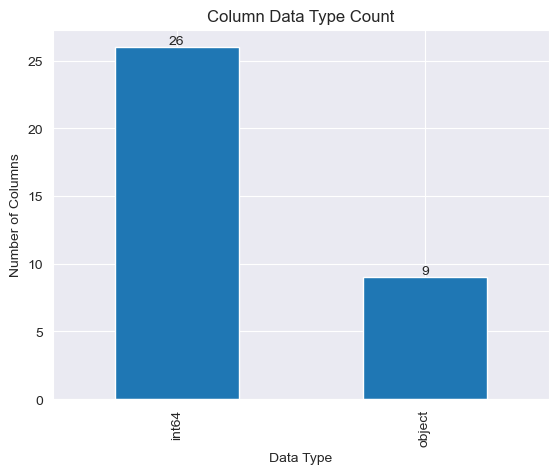

In [6]:
# Count the number of columns for each dtype
dtype_counts = df.dtypes.value_counts()

# Plot
dtype_counts.plot(kind='bar')
plt.xlabel('Data Type')
plt.ylabel('Number of Columns')
plt.title('Column Data Type Count')

# Annotate each bar with the count of the data type
for index, value in enumerate(dtype_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

The dataset comprises a total of 35 columns, with 26 of these being integer (int64) variables and 9 being categorical variables. This composition aligns with the provided description of the raw data, indicating that the dataset includes a mix of numerical and categorical information suitable for analysis.

### 1.2.3 Numerical Features

In [7]:
# Statistic value analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In our analysis, we found that the variables EmployeeCount and StandardHours consistently hold the values of 1 and 88, respectively. This consistency suggests these variables do not vary and, therefore, are unlikely to provide meaningful insights for future research. As such, it is recommended that they be excluded from further analysis.
<br>
Given that Attrition is a categorical variable, converting it into a binary column will enhance our ability to conduct numerical feature analysis. This transformation will simplify the process of integrating Attrition data into quantitative analyses, allowing for more straightforward interpretation and evaluation of its impact.

In [8]:
# Dropping 'EmployeeCount' and 'StandardHours' columns
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)

# Encode 'Attrition' as a binary variable
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

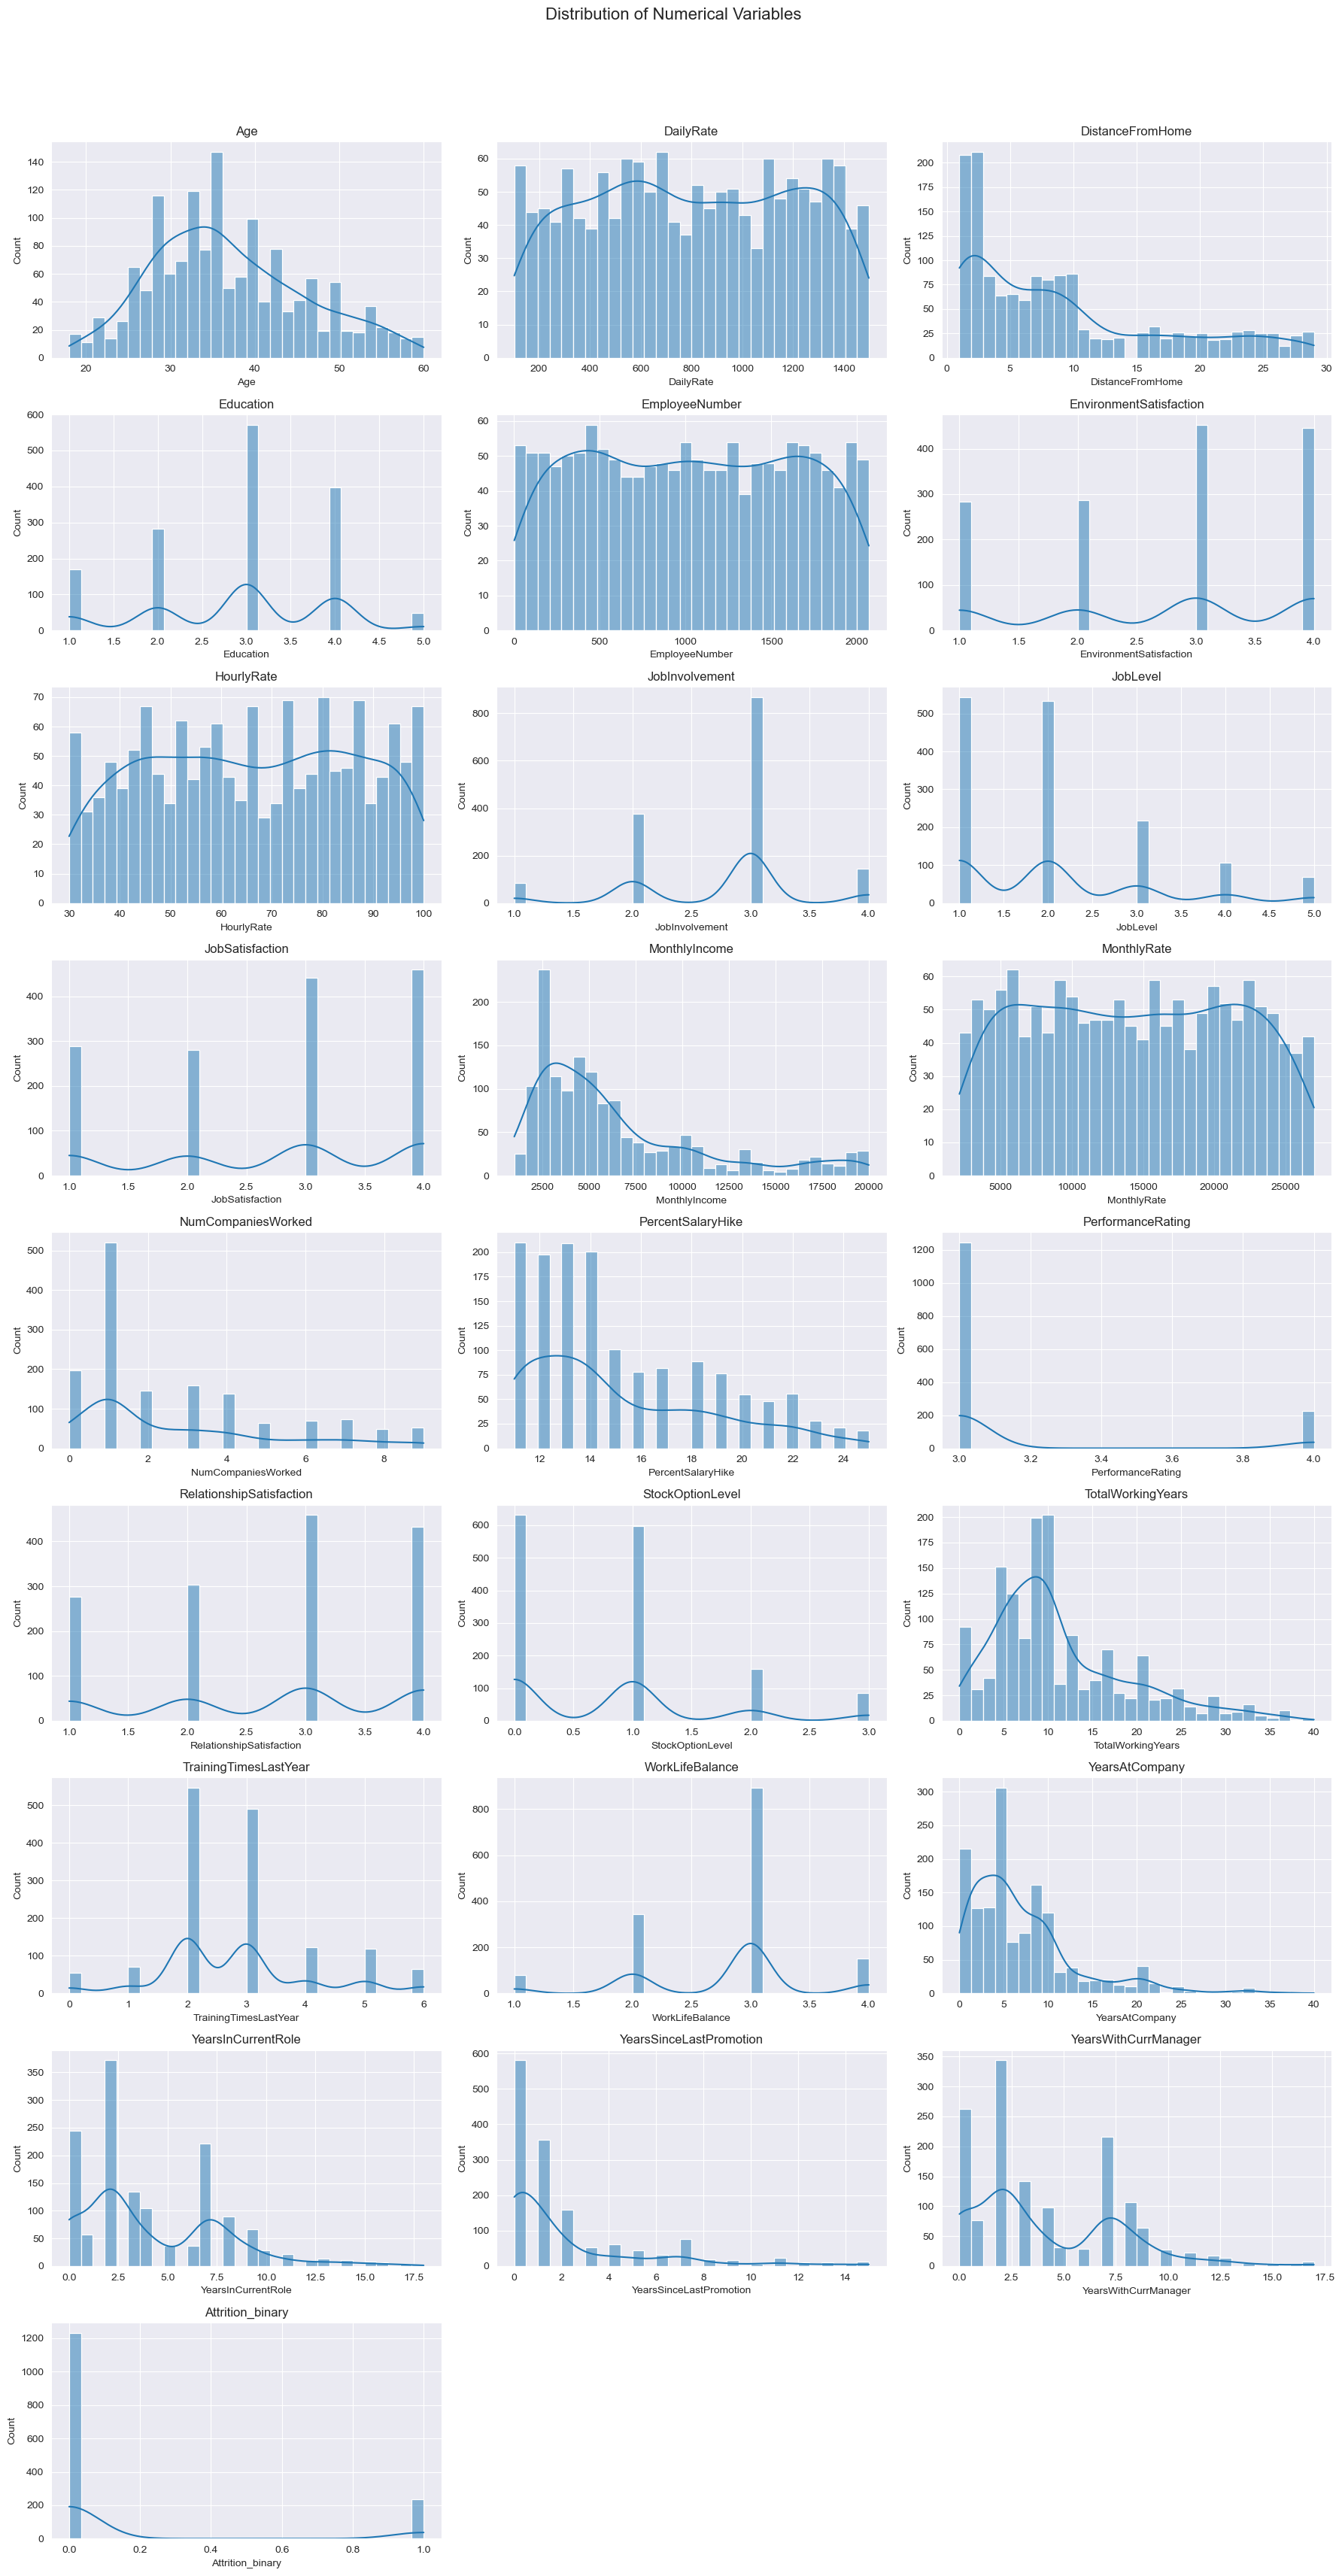

In [9]:
# Plotting distributions for all numerical variables to check for outliers and noise
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Setting up the plotting area
n_rows = len(numerical_variables) // 3 + (len(numerical_variables) % 3 > 0)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_variables):
    row = i // 3
    col = i % 3
    sns.histplot(df[var], kde=True, ax=axes[row, col], bins=30)
    axes[row, col].set_title(var)

# Adjust layout to prevent overlap and remove empty subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if len(numerical_variables) % 3:
    for j in range(3 - len(numerical_variables) % 3):
        fig.delaxes(axes.flatten()[-(j + 1)])

plt.show()

Most variables display a variety of distribution shapes, including normal-like distributions (e.g., Age), skewed distributions (e.g., TotalWorkingYears, YearsAtCompany), and distributions with clear peaks (e.g., Education).
<br>
Several variables exhibit potential outliers. For instance, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager show long tails, suggesting the presence of employees with unusually high values compared to the rest.
<br>
Noisiness and Type of Noise:

* Stochastic Noise: The variability seen in variables like DailyRate, HourlyRate, and MonthlyRate appears stochastic, reflecting natural fluctuations in compensation rates.
* Rounding Errors: There's no clear indication of rounding errors from these plots; most continuous variables show smooth distributions without unnatural spikes that would suggest rounding.

Some variables, like DistanceFromHome, exhibit bimodal or multimodal tendencies, suggesting the presence of distinct groups within the workforce, possibly based on geographic or departmental segmentation.
<br>
Observing the distributions and characteristics of the numerical values, it's evident that some variables, despite being numerical in format, might actually represent categorical information due to their discrete nature and limited range of values. These variables include:
* Education: Typically represented on a scale (e.g., 1 for 'Below College', 2 for 'College', 3 for 'Bachelor', etc.), indicating different levels of educational attainment, which makes it a categorical variable encoded as numerical.
* EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, and WorkLifeBalance: These variables are likely measured on a Likert scale (e.g., from 1 to 4 or 1 to 5), where each number represents a level of satisfaction or engagement, categorizing them as ordinal variables.
* JobLevel: Indicates a hierarchical position within the company, where higher numbers represent higher positions. Despite being numeric, the discrete levels act as categories.
* StockOptionLevel: Represents the level of stock options provided to employees, which is categorical as it describes different predefined groups of stock option benefits.
* TrainingTimesLastYear: Counts the number of training sessions attended, which could be considered categorical if there are only a few distinct, commonly occurring values, representing different training groups.

These variables are encoded as integers but represent ordered categories, making them ordinal categorical variables. Their discrete and limited nature suggests that analyses should treat them as categories, which can provide insights into group differences or trends that might not be apparent when treating them purely as numeric.

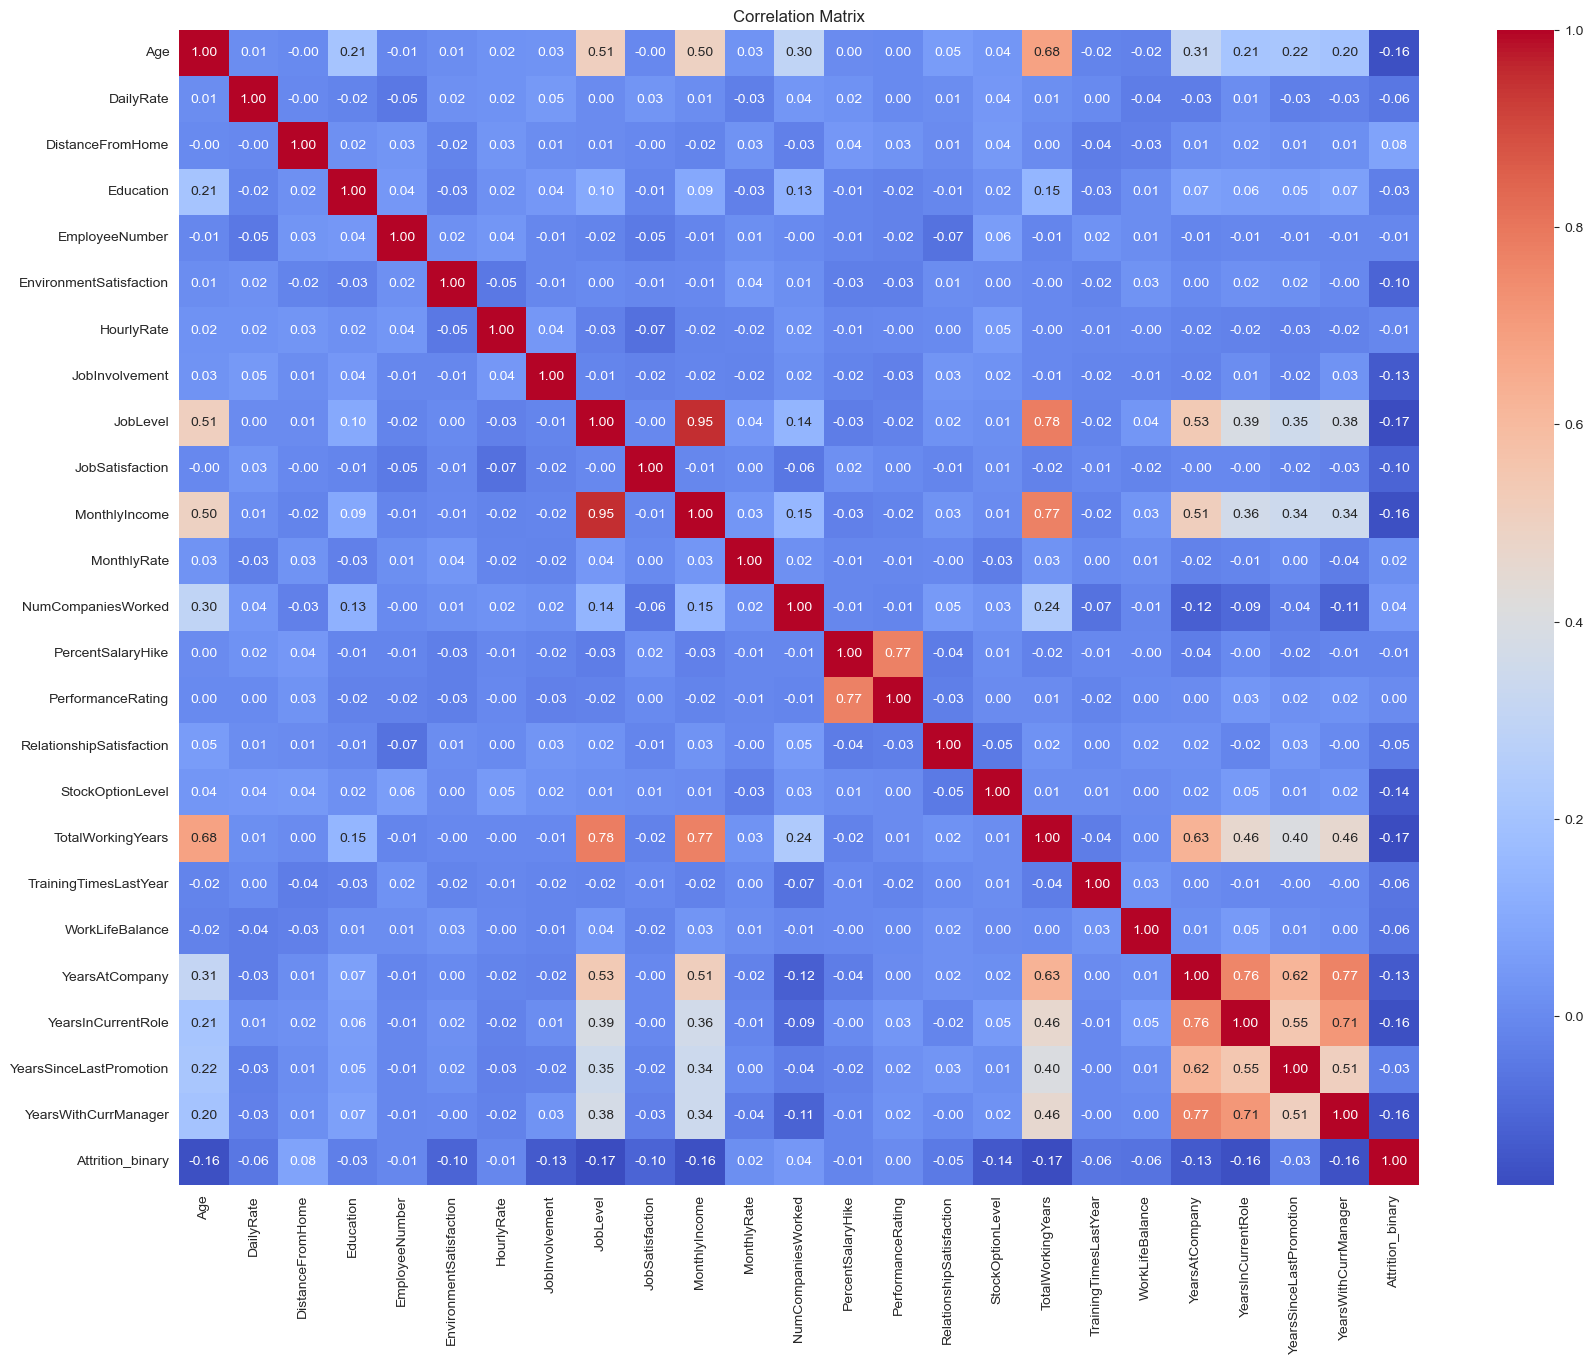

In [10]:
# Calculating the correlation matrix 
correlation_matrix_dropped = df.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_dropped, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap above displays the correlation matrix for all numerical variables in the dataset. Each cell in the heatmap shows the correlation coefficient between two variables, ranging from -1 to 1. A coefficient close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. Conversely, a coefficient close to -1 indicates a strong negative correlation, where an increase in one variable is associated with a decrease in the other. Coefficients around 0 suggest little to no linear relationship.
<br>
Key observations regarding the correlation with Attrition_binary include:
* Variables like TotalWorkingYears, JobLevel, and Age have notable negative correlations with attrition, reinforcing the idea that more experienced and older employees are less likely to leave.
* DistanceFromHome and NumCompaniesWorked show positive correlations with attrition, suggesting factors such as commute distance and a history of working for multiple companies may contribute to an employee's likelihood of leaving.

Several notable interactions between variables, aside from their relationship with attrition:
* Age and Total Working Years: A strong positive correlation indicates that, as expected, older employees tend to have more working years. This relationship is intuitive and highlights career progression.
* Job Level and Monthly Income: There's a significant positive correlation, suggesting that higher job levels are associated with higher monthly incomes. This reflects the typical organizational structure where positions at higher levels command greater compensation.
* Years at Company and Several Other Variables: Years at the company shows strong positive correlations with variables like YearsInCurrentRole, YearsWithCurrManager, and YearsSinceLastPromotion. These correlations suggest that employees who have been at the company longer tend to have spent more time in their current role, with their current manager, and it has been longer since their last promotion. This could indicate career stability but might also suggest potential areas for improving career development pathways to prevent stagnation.
* Total Working Years and Job Level: The positive correlation here indicates that employees with more total working years tend to have higher job levels, suggesting a progression in their careers over time.
* Monthly Income and Several Variables: Monthly income shows strong positive correlations with TotalWorkingYears, JobLevel, and Age. These relationships underscore the impact of experience, position, and age on compensation.
* NumCompaniesWorked and Age: A slight positive correlation suggests that, on average, older employees have worked for more companies. This could reflect career exploration or changes over an individual's working life.

To study further, we will do a detailed EDA to check the correlations with Attrition

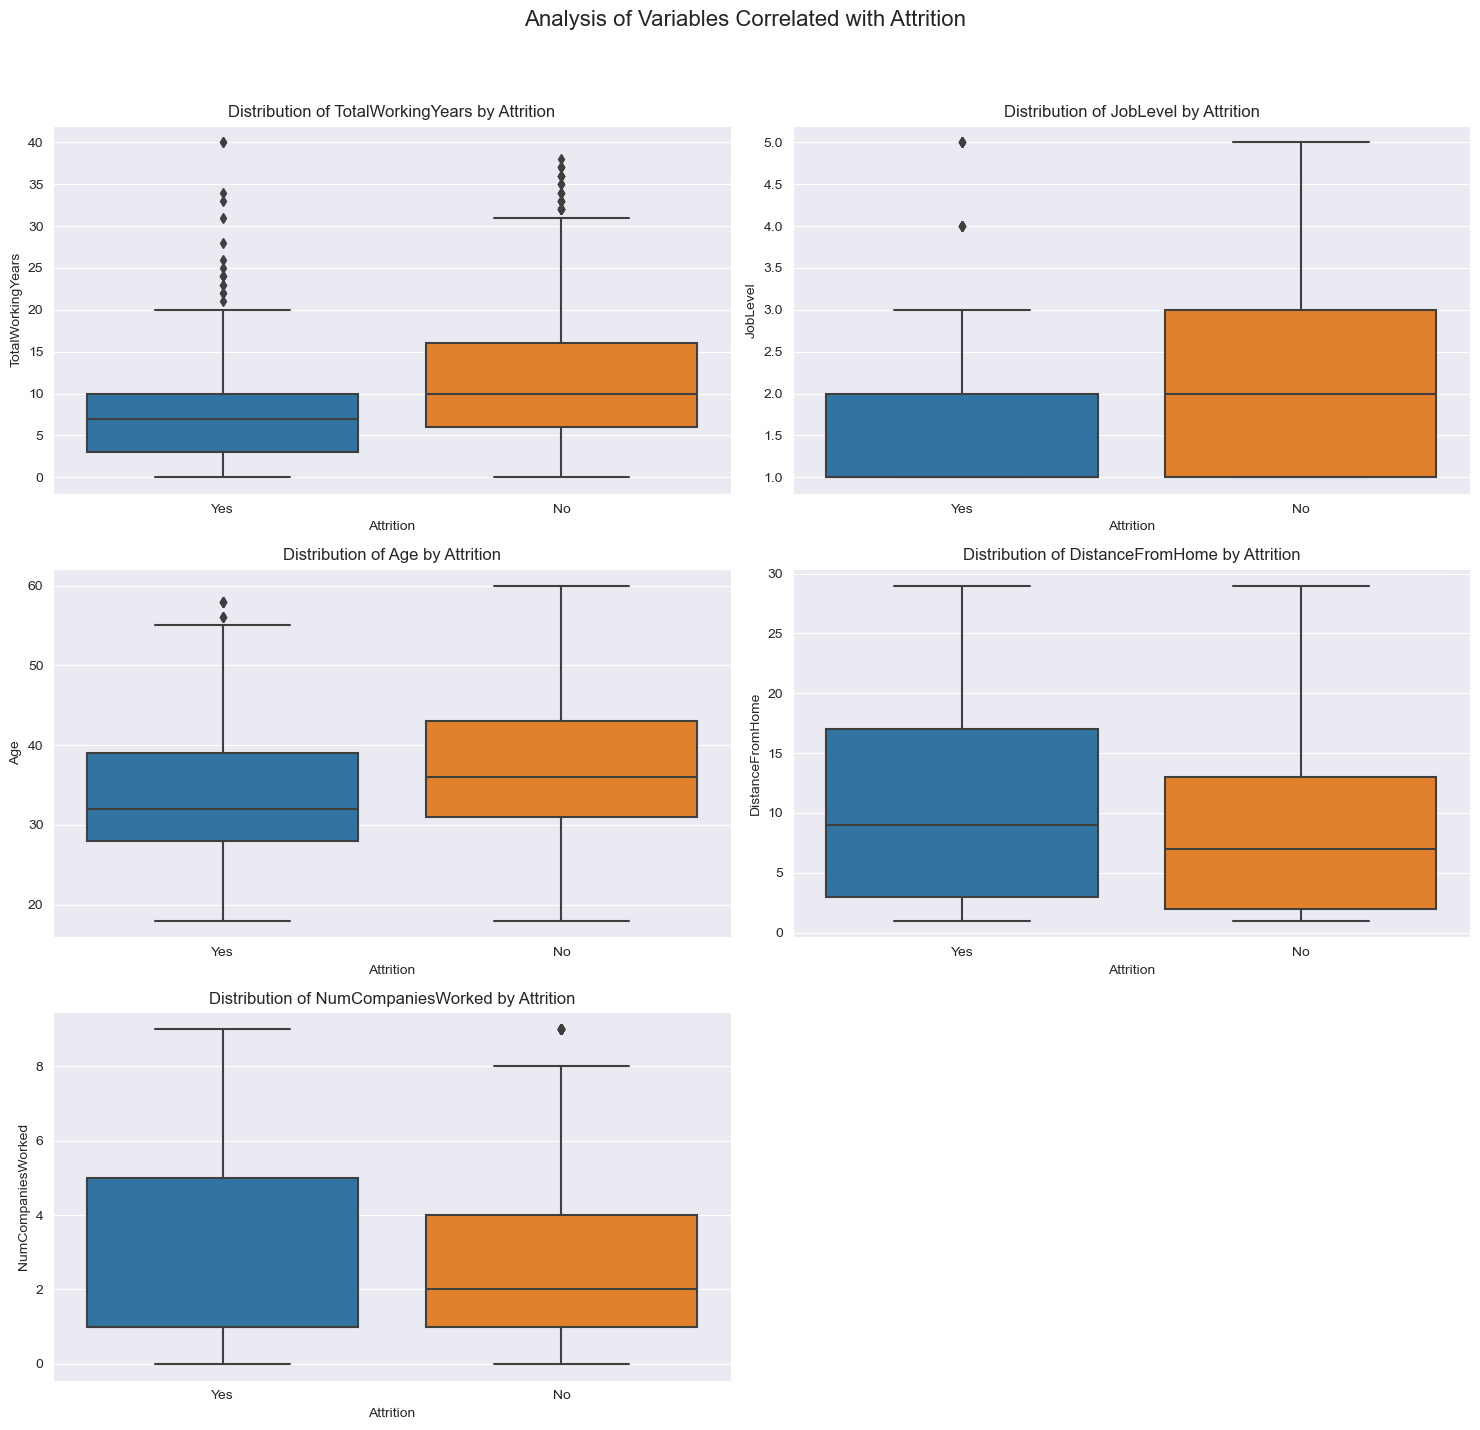

In [11]:
# Check correlated variables with Attrition

# Setting up the plotting area
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Analysis of Variables Correlated with Attrition', fontsize=16)

# Plotting distributions of selected variables against Attrition
variables_to_plot = ['TotalWorkingYears', 'JobLevel', 'Age', 'DistanceFromHome', 'NumCompaniesWorked']
attrition_status = ['Yes', 'No']

for i, var in enumerate(variables_to_plot):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col], x='Attrition', y=var, data=df)
    axes[row, col].set_title(f'Distribution of {var} by Attrition')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Removing the empty subplot (if any)
if len(variables_to_plot) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

The boxplot visualizations provide a detailed view of how the selected variables correlate with attrition:

* TotalWorkingYears: Employees who have left the company tend to have fewer total working years compared to those who stayed, indicating that individuals with more experience or tenure are less likely to leave.

* JobLevel: Similarly, employees at higher job levels are less likely to have left the company. This suggests that higher positions, which likely come with better compensation and job satisfaction, are associated with lower attrition rates.

* Age: The age distribution shows that younger employees are more likely to leave than older ones. This could be due to various factors, including career exploration, seeking better opportunities, or less attachment to the organization.

* DistanceFromHome: Employees who live further from work are more likely to leave the company. The commute might be a significant factor in their decision to leave, possibly due to the stress and time associated with long commutes.

* NumCompaniesWorked: There's a noticeable trend where employees who have worked at more companies are also more likely to leave. This could indicate a pattern of job-hopping or a preference for change, suggesting these employees may be less inclined to long-term commitments to a single employer.

### 1.2.4 Categorical Features

In [12]:
# Converting the identified potential categorical variables from 1.2.3 to categorical
categorical_vars = [
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'JobLevel',
    'StockOptionLevel',
    'TrainingTimesLastYear'
]

for var in categorical_vars:
    df[var] = df[var].astype('category')

In [13]:
# Adding original categorical variables for comparison
original_categorical_vars = ['Department', 'BusinessTravel', 'Gender', 'MaritalStatus', 'Over18', 'OverTime','EducationField',
    'JobRole',]
all_categorical_vars = categorical_vars + original_categorical_vars

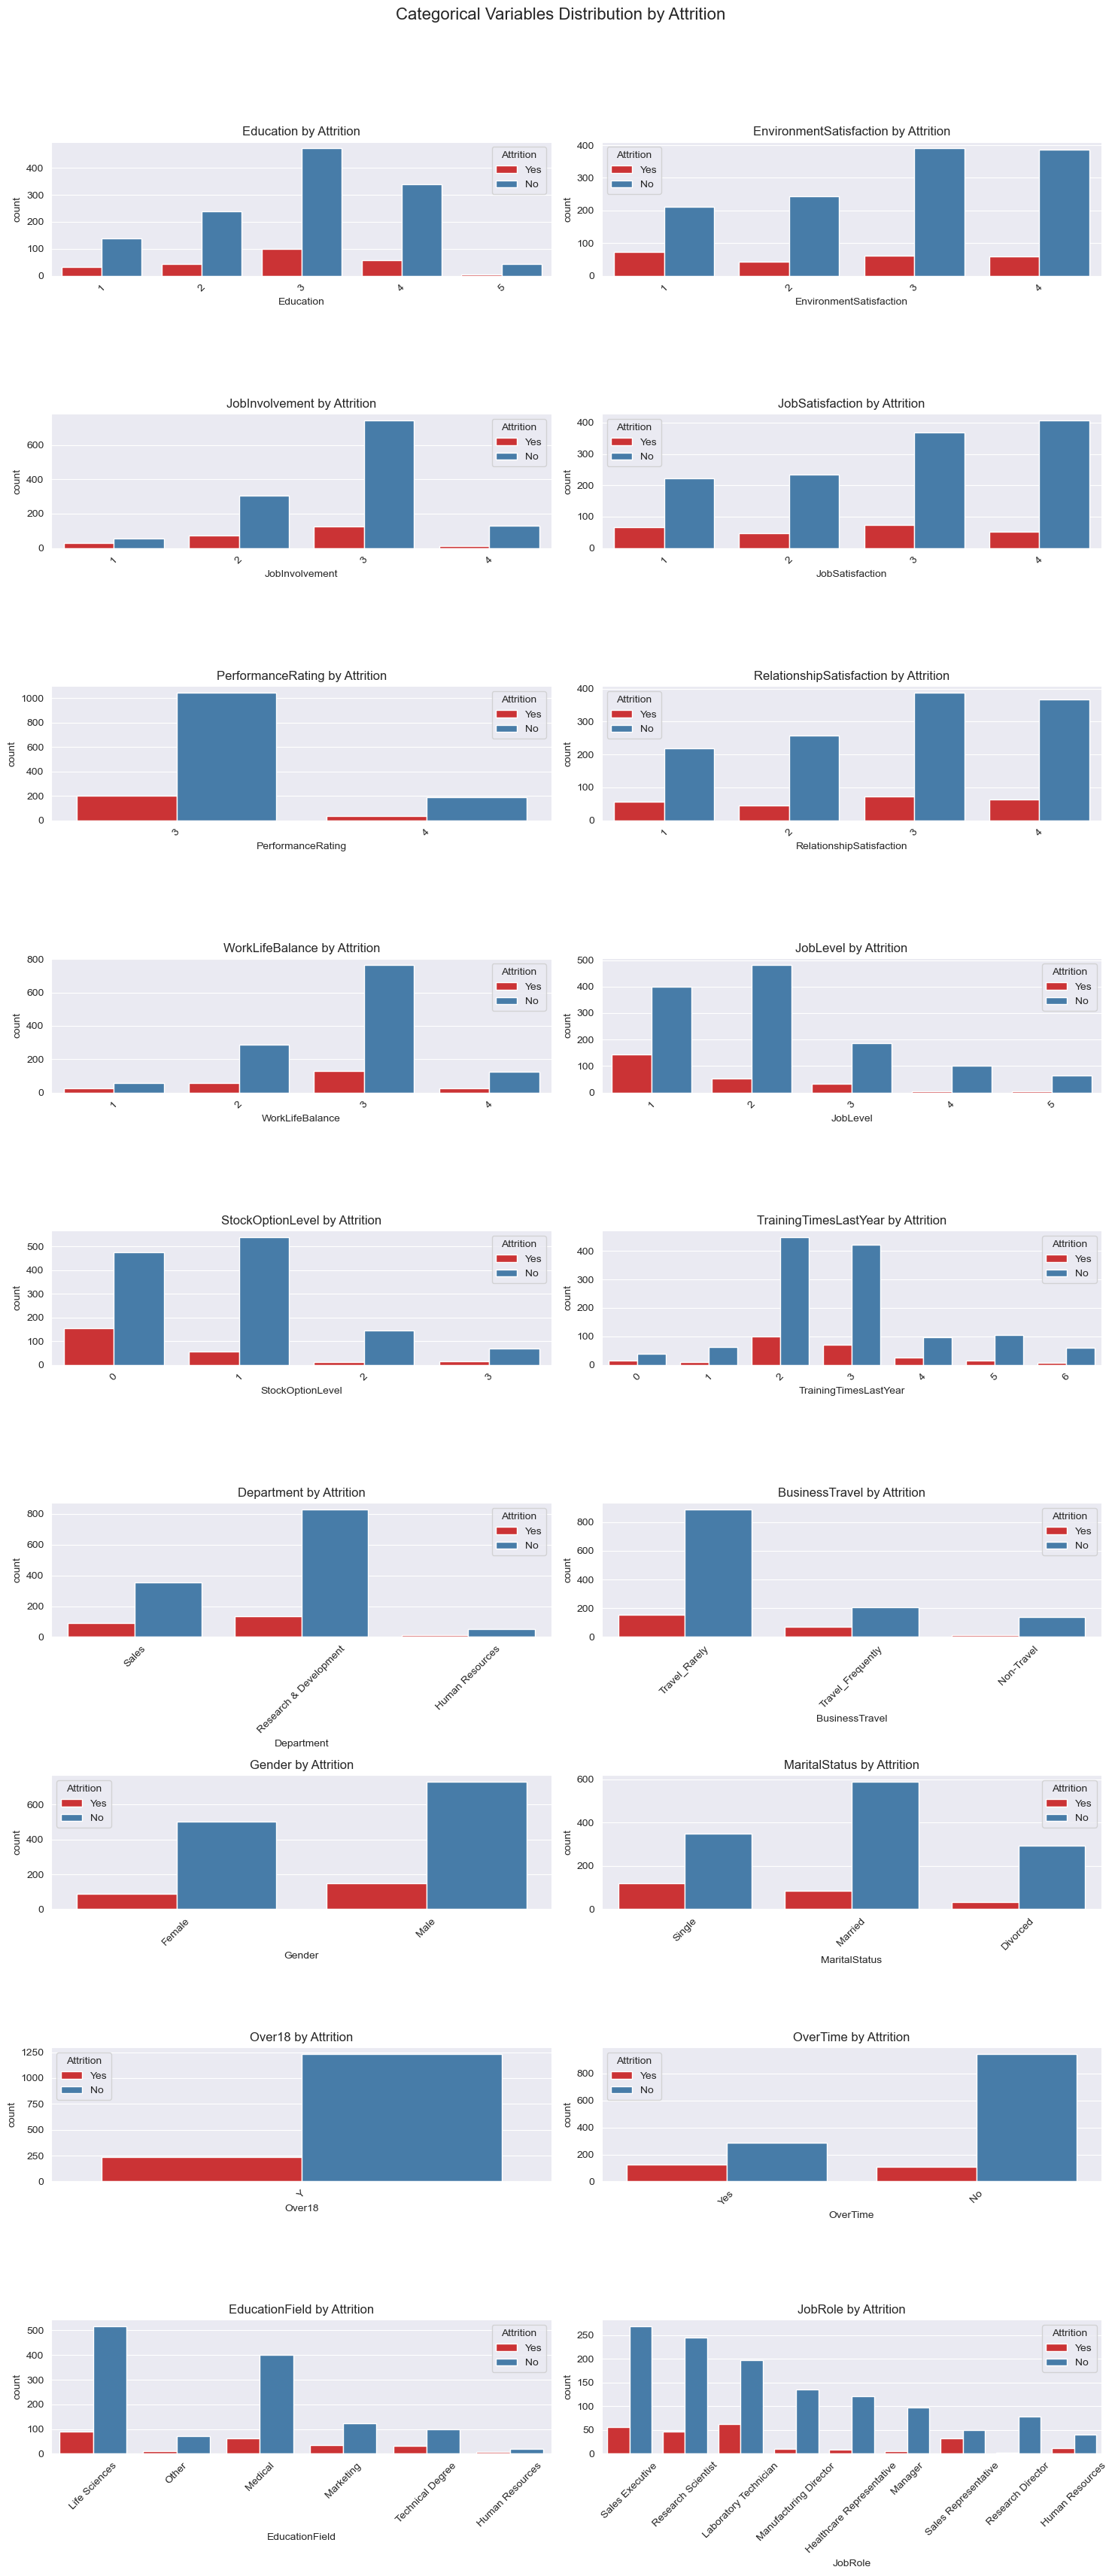

In [14]:
# Setting up the plotting area for categorical variables against Attrition
n_cat_vars = len(all_categorical_vars)
n_rows = n_cat_vars // 2 + (n_cat_vars % 2 > 0)
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 4))
fig.suptitle('Categorical Variables Distribution by Attrition', fontsize=16)

for i, var in enumerate(all_categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axes[row, col], x=var, hue='Attrition', data=df, palette="Set1")
    axes[row, col].set_title(f'{var} by Attrition')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Removing the empty subplot if an odd number of categorical variables
if n_cat_vars % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

The visualizations illustrate the distribution of both transformed and original categorical variables by attrition status, providing insights into how different categories may influence an employee's decision to leave:
* Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, etc.: These transformed categorical variables show varying distributions across their categories when split by attrition status. Certain levels of satisfaction (e.g., lower environment satisfaction) and involvement might be more associated with higher attrition rates.
* Department: The distribution suggests that attrition rates may vary across different departments, with some departments potentially experiencing higher turnover.
* BusinessTravel: Employees who travel frequently appear to have a higher attrition rate compared to those who travel less or not at all, indicating that travel demands may impact employee retention.
* Gender: The attrition distribution between genders offers insights into whether one gender may be more likely to leave than the other, although differences may not be pronounced.
* MaritalStatus: The attrition rates differ among single, married, and divorced employees, with single employees potentially showing higher attrition, suggesting marital status may play a role in an employee's likelihood to leave.

### 1.2.5 VIF Analysis 

In [15]:
# Selecting numerical variables for multicollinearity analysis after transforming categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Adding a constant for the intercept
X = add_constant(df[numerical_vars])

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]

vif_data[1:]

,Variable,VIF
1,Age,2.005141
2,DailyRate,1.015706
3,DistanceFromHome,1.014292
4,EmployeeNumber,1.005897
5,HourlyRate,1.005781
6,MonthlyIncome,2.536239
7,MonthlyRate,1.008155
8,NumCompaniesWorked,1.249910
9,PercentSalaryHike,1.006563
10,TotalWorkingYears,4.644095


Multicollinearity analysis involves examining the correlation between independent variables in a dataset to identify variables that are highly correlated with each other. High multicollinearity can be problematic in regression models because it undermines the statistical significance of an independent variable.
<br>
All of the numerical variables in the dataset have Variance Inflation Factors (VIFs) below 10, indicating a low level of multicollinearity among them. This suggests that these variables are sufficiently independent for the purposes of regression modeling, mitigating concerns about multicollinearity adversely affecting the model's accuracy and reliability. Consequently, we can proceed with building the regression model without needing to exclude variables for multicollinearity reasons.

### 1.2.6 EDA Conclusion

The EDA suggests that both numerical and categorical variables in the dataset provide valuable insights into factors that may influence an employee's likelihood of leaving the company. 
<br>
Therefore, we will retain all variables for further analysis, except for the two columns, 'EmployeeCount' and 'StandardHours,' which were dropped as per section 1.2.3 due to their constant values. This decision ensures that our analysis incorporates a comprehensive range of variables, enhancing the potential for insightful findings, while also addressing data redundancy by excluding variables that do not contribute to variability in the dataset.

## 1.3.0 Data Preprocessing Prepared

In [3]:
# Read Excel file again to keep data intact and Drop the 'EmployeeCount' and 'StandardHours' mentioned in 1.2.3
df = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx", engine="openpyxl")

# Dropping 'EmployeeCount' and 'StandardHours' columns
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

### 1.3.1 One-Hot Encoding

In [5]:
from projectpreprocessing import one_hot_encode
# ['Department', 'MaritalStatus', 'Gender', 'JobRole','EducationField', 'Attrition', 'Over18', 'OverTime', 'BusinessTravel'] # Nominal Variables (No Rank)
df_encoded_nominal = one_hot_encode(df)

In [6]:
df_encoded_nominal.head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### 1.3.2 Normalization - MinMaxScaler

In [7]:
from projectpreprocessing import min_max_scale

df_scaled = min_max_scale(df_encoded_nominal)

In [8]:
df_scaled.head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0.547619,0.715820,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 1.3.3 PCA

In [9]:
from projectpreprocessing import apply_pca

df_pca = apply_pca(df_scaled, n_components=3)
df_pca["Attrition_Yes"] = df_pca["Attrition_Yes"].astype(int)

In [10]:
df_pca.head(5)

,PCA_Component_1,PCA_Component_2,PCA_Component_3,Attrition_Yes
0,1.117471,0.887239,-0.497340,1
1,-0.660709,-0.264092,-0.845545,0
2,-0.615596,0.797654,0.282730,1
3,-0.633638,-0.110482,-0.806445,0
4,-0.676460,-0.636270,0.720302,0


# 2.0.0 Models

## 2.1.0 Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score


# Splitting the dataset into training and testing sets
X = df_pca.drop('Attrition_Yes', axis=1)
y = df_pca['Attrition_Yes']

# Initialize the naive model
naive_logistic_model = LogisticRegression(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)

# Train the model
naive_logistic_model.fit(X_train, y_train)

# Predictions on training set for recall calculation
y_train_pred = naive_logistic_model.predict(X_train)

# Get the prediction
y_test_pred = naive_logistic_model.predict(X_test)

# Calculate recall score for both training and testing sets
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

recall_train, recall_test

(0.5631578947368421, 0.5957446808510638)

### 2.1.1 Use Cross Validation & Grid Search to find the best parameter

In [12]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the model with class weight parameter
log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)

# Defining the grid of parameters to search over, including class_weight if needed
param_grid = {
    'C': [0.001, 0.002, 0.003, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Setting up the grid search with logistic regression, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(log_reg, param_grid, cv=kfold, scoring='recall')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_

# Best score achieved during cross-validation
best_score = grid_search.best_score_

# Predicting the test set results with the best estimator
y_pred = grid_search.predict(X_test)

# Calculating the recall of the best estimator on the test set
test_recall = recall_score(y_test, y_pred)

In [13]:
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Test Set Recall Score: {test_recall:.4f}")

Best Parameters: {'C': 0.001, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.6000
Test Set Recall Score: 0.6170


### 2.1.2 Learning Curves

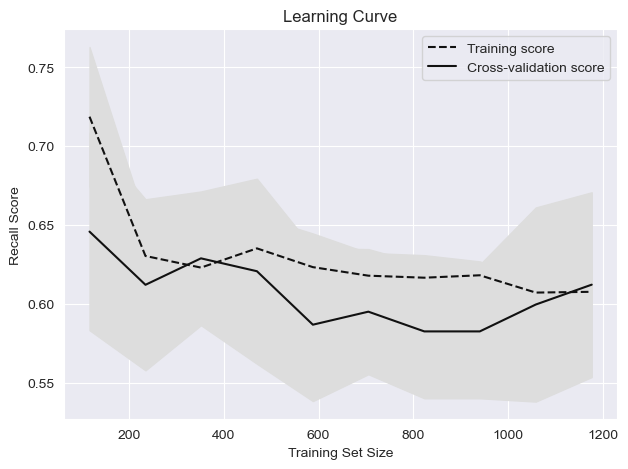

In [14]:
from projectpreprocessing import plot_learning_curves
# Initialize the model with best parameters
best_logistic_regression_model = LogisticRegression(C=0.001, solver='liblinear', class_weight='balanced')
# Function to plot learning curves
plot_learning_curves(best_logistic_regression_model, X, y, kfold)

The graph demonstrates: 

* Initially, there is a large gap between the training score and the cross-validation score, with the training score starting high and then decreasing, while the cross-validation score increases. This suggests a certain degree of overfitting when the training set is very small because the model is too tailored to the limited training data and does not generalize well.

* As more data is added, the training score decreases slightly and the cross-validation score improves, which indicates that the model is benefiting from more data and is generalizing better. The gap between the two scores narrows, which is a good sign and indicates that overfitting is decreasing.

* Towards the end of the curve, both scores are converging but not yet fully converged. The convergence of the scores suggests the model is approaching a good balance between bias and variance, but there might still be room for improvement.

* The shaded areas represent the standard deviation of the recall score for the training and cross-validation scores. The relatively wide bands indicate that there is variability in the model's performance, which could be due to the complexity of the model, the nature of the data, or differences in the subsets of data used in the cross-validation folds.

The learning curve suggests that the model is neither severely overfitting nor underfitting but rather appears to generalize well, with possible limitations in terms of model or data improvement potential. 

### 2.1.3 Interpret the Model Metric and performance

In [17]:
# Initialize the model with best parameters
best_logistic_regression_model = LogisticRegression(C=0.001, solver='liblinear', class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)
# Train the model
best_logistic_regression_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_logistic_regression_model.predict(X_test)

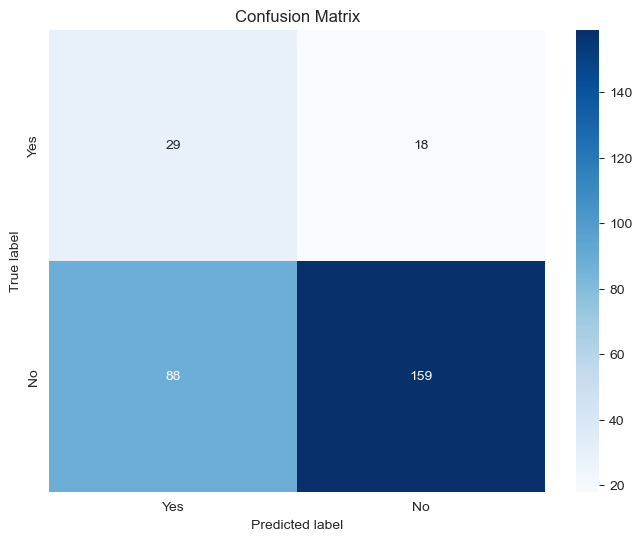

In [18]:
from projectpreprocessing import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)

In [82]:
## 2.2.0 SVM

In [ ]:
## 2.3.0 Decision Trees

In [ ]:
## 2.4.0 Random Forest

In [ ]:
## 2.5.0 XGBoost

In [ ]:
## 2.6.0 Deep Learning Model